In [2]:
import pandas as pd

In [3]:
# reading the csv file
df_population_raw = pd.read_csv('population_total.csv')

In [4]:
# first look at the dataset
df_population_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


## 1 Making a Pivot Table

.pivot(): return reshaped DataFrame organized by given index / column values("pivot without aggregation")

In [5]:
# dropping null values
df_population_raw.dropna(inplace=True)

In [6]:
# making a pivot table
df_pivot = df_population_raw.pivot(index="year", columns="country", values="population")

In [7]:
df_pivot = df_pivot[['United States', 'India', 'China', 'Indonesia', 'Brazil']]

In [8]:
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


## 2 Lineplot

<Axes: title={'center': 'Population (1995 - 2020)'}, xlabel='Year', ylabel='Plopulation'>

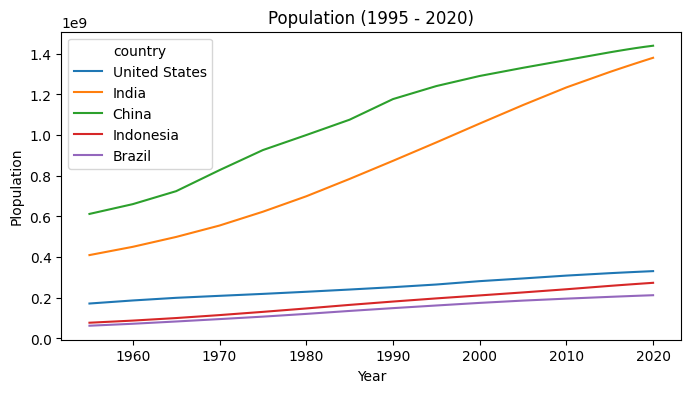

In [9]:
df_pivot.plot(kind='line', xlabel="Year", ylabel="Plopulation",
              title="Population (1995 - 2020)", figsize=(8, 4))

## 3 Batplot

3.1 Single Barplot

In [10]:
# selecting only one year (2020)
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]

In [11]:
# showing new dataframe
df_pivot_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [12]:
# transpose dataframe from rows to columns or viceversa
df_pivot_2020 = df_pivot_2020.T

<Axes: title={'center': 'Population (2020)'}, xlabel='Year', ylabel='Plopulation'>

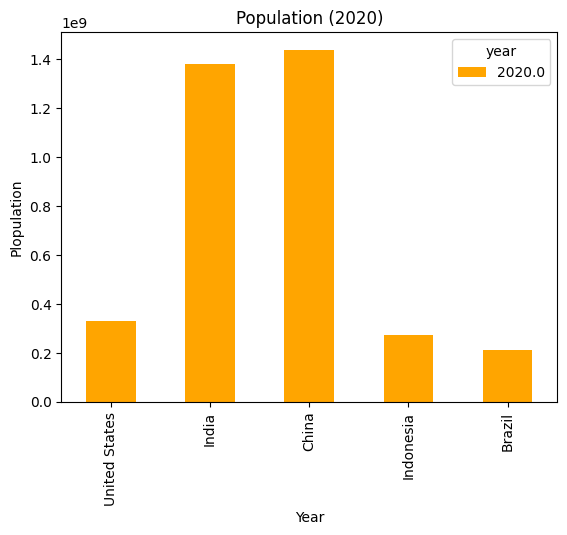

In [13]:
# making barplot
df_pivot_2020.plot(kind="bar", color="orange", 
                   xlabel="Year", ylabel="Plopulation",
                   title="Population (2020)")

## 3.2 Barplot grouped by "n" variables

In [14]:
# selecting a few years
df_pivot_sample = df_pivot[df_pivot.index.isin([1980, 1990, 2000, 2010, 2020])]

<Axes: xlabel='Year', ylabel='Plopulation'>

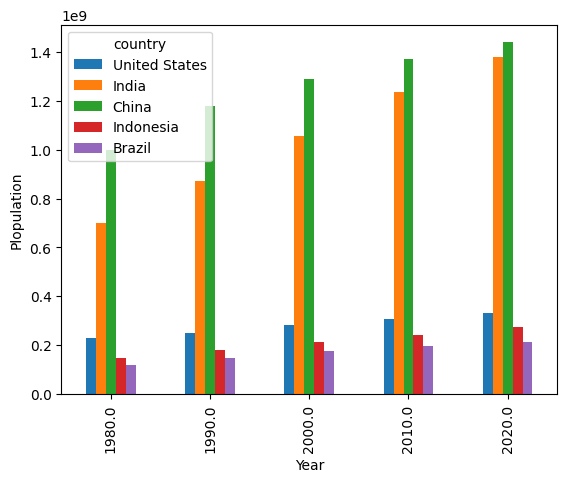

In [15]:
# making grouped barplot
df_pivot_sample.plot(kind="bar", xlabel="Year", ylabel="Plopulation")

## 4 Piechart

In [16]:
# changing column name
df_pivot_2020.rename(columns={2020:'2020'}, inplace=True)

<Axes: ylabel='2020'>

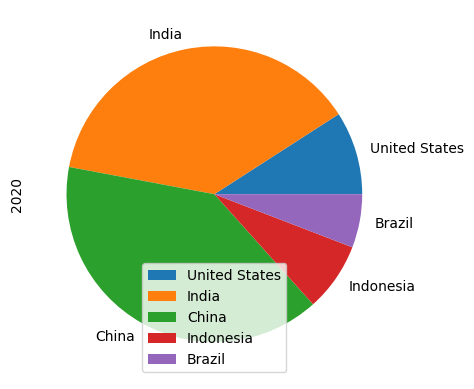

In [17]:
# making the plot
df_pivot_2020.plot(kind="pie", y='2020')

## 5 Boxplot

5.1 Single Boxplot

<Axes: >

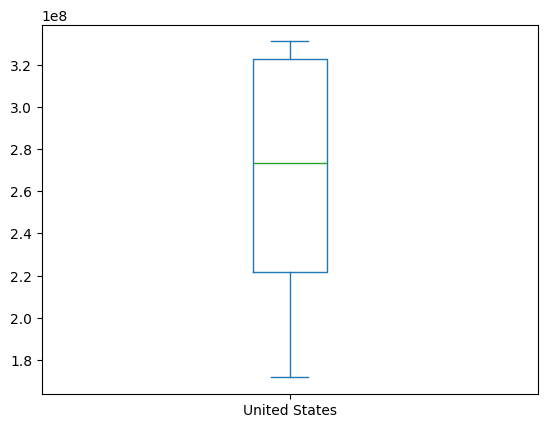

In [18]:
df_pivot['United States'].plot(kind="box")

## 5.2 Multiple Boxplot

<Axes: >

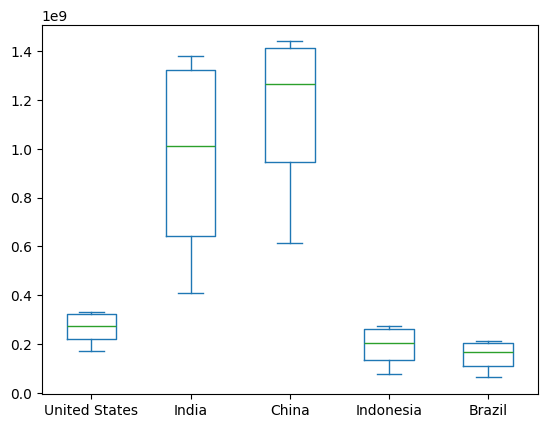

In [19]:
df_pivot.plot(kind="box")

## 6 Histogram

<Axes: ylabel='Frequency'>

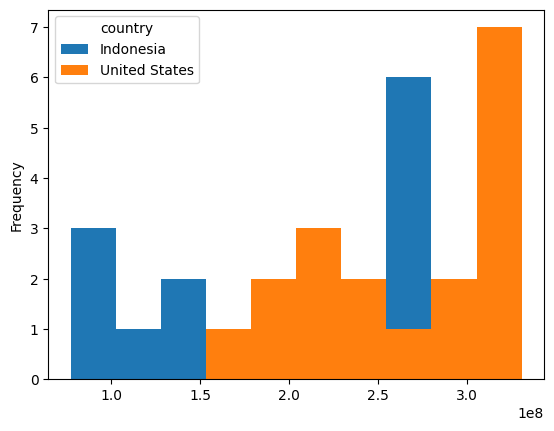

In [20]:
df_pivot[['Indonesia', 'United States']].plot(kind='hist')

## 7 ScatterPlot

In [21]:
# selecting a simple of the raw data
df_sample = df_population_raw[df_population_raw['country'].isin(['United States', 'India', 'China', 'Indonesia', 'Brazil'])]

<Axes: xlabel='year', ylabel='population'>

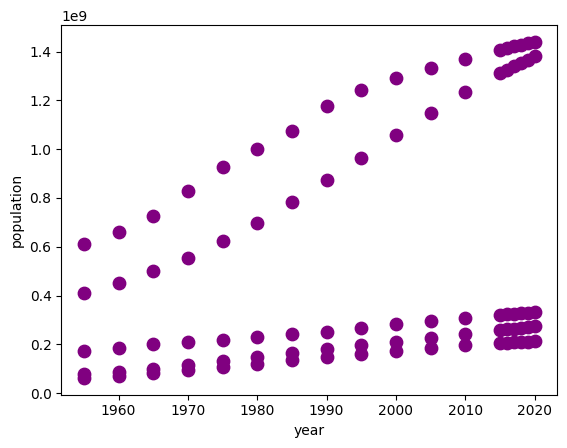

In [22]:
# creating the plot
df_sample.plot(kind='scatter', 
               x='year',
               y='population',
               s=80,
               color='purple')

In [23]:
# importing matplotlib
import matplotlib.pyplot as plt

## 2 Lineplot

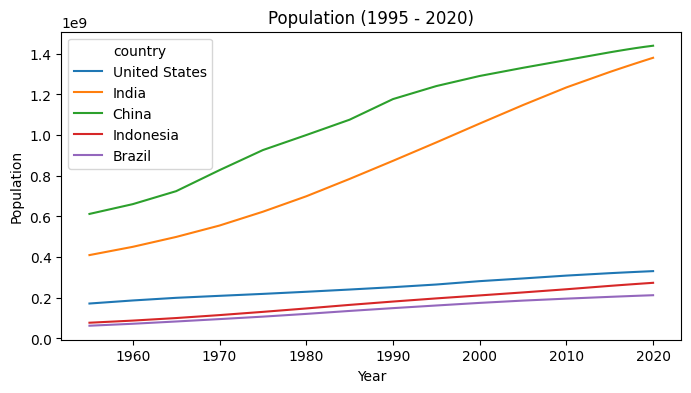

In [25]:
df_pivot.plot(kind='line',
              xlabel='Year', ylabel='Population',
              title='Population (1995 - 2020)',
              figsize=(8, 4))

# save plot
plt.savefig('my_test.png')
# show plot
plt.show()

In [26]:
df_pivot.to_excel('pivot_table.xlsx')